<a href="https://colab.research.google.com/github/G284952022/medialabo/blob/main/Pr4_2_Binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pr4-2: 2値化処理

## 2値化処理の下準備

2値化処理を理解するには，画像のヒストグラムを表示して対応付けると良いです．

Pr2-2の復習になりますが，下記のコードでヒストグラムを表示してみます．

```py
# ヒストグラムの計算
hist = cv2.calcHist([I_gray],channels=[0],mask=None,histSize=[256],ranges=[0,256])

# ヒストグラムの表示
plt.plot(hist)
```



Text(0.5, 1.0, 'Histogram')

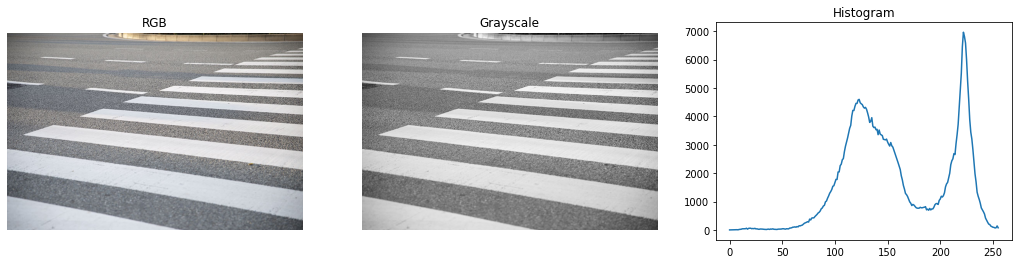

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像ファイル名の指定
image_file = "crossing.jpg"

# 画像ファイルの読み込み
I_bgr = cv2.imread(image_file)

# BGRからRGBへの変換
I_rgb = cv2.cvtColor(I_bgr, cv2.COLOR_BGR2RGB)

# RGBからGrayへの変換
I_gray = cv2.cvtColor(I_rgb, cv2.COLOR_RGB2GRAY)

# Grayスケール画像のヒストグラムを計算
hist = hist = cv2.calcHist([I_gray],channels=[0],mask=None,histSize=[256],ranges=[0,256])


# 表示処理
fig = plt.figure(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.imshow(I_rgb)
plt.title("RGB")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(I_gray, cmap="gray")
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(hist)
plt.title("Histogram")


## 2値化を自前でやってみましょう

上の横断歩道のグラフを見ると，170～190の辺りに谷になっている場所があります．
そこに明るさの閾値を設定して，

- 黒（値が0）  : I_grayの明るさが170以下
- 白（値が255）: I_grayの明るさが170より大きい

を自前でやってみましょう．

以下のコードを実行すると，どこも黒（値が0）の画像が生成されます．

```py
B = np.zeros_like(I_gray)
```

そこで，「I_grayの明るさが170より大きい」条件で値を255にすることを考えます．<br>
Pythonの画像行列では，条件を不等号でそのまま表現できるので便利です．

```py
# I_gray > 170より大きいところを選択して，Bの該当箇所に255をセットする．
B[I_gray > 170] = 255
```

(-0.5, 767.5, 511.5, -0.5)

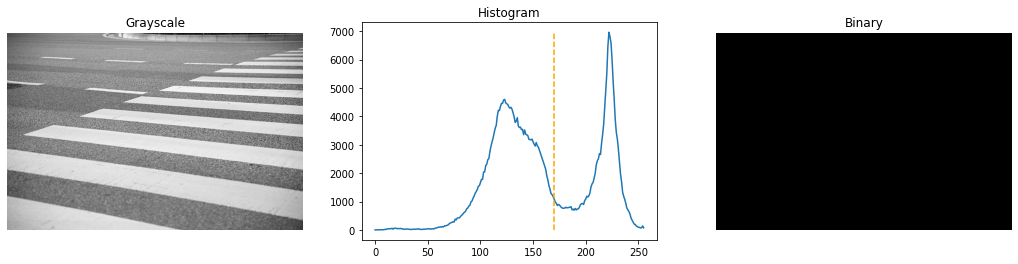

In [ ]:
# I_grayと同じサイズの画像を作る
B = np.zeros_like(I_gray)

# Work: 2値化処理を自前でやってみる．
B[:,:] = 255

fig = plt.figure(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.imshow(I_gray, cmap="gray")
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(hist)
plt.plot([170, 170], [0, np.max(hist)], "--", color="orange")
plt.title("Histogram")

plt.subplot(1, 3, 3)
plt.imshow(B, cmap="gray")
plt.title("Binary")
plt.axis('off')
plt.show()

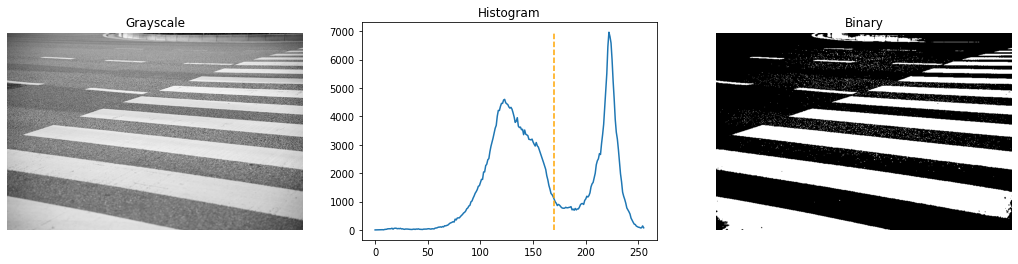

In [ ]:
#@title ツール化: スライダーで閾値を設定 { run: "auto" }
#@markdown スライダーを動かして結果を見てみましょう．
th = 170 #@param {type:"slider", min:0, max:255, step:1}

# I_grayと同じサイズの画像を作る
B = np.zeros_like(I_gray)

# Work: 2値化処理を自前でやってみる．
B[I_gray > th] = 255

fig = plt.figure(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.imshow(I_gray, cmap="gray")
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(hist)
plt.plot([th, th], [0, np.max(hist)], "--", color="orange")
plt.title("Histogram")

plt.subplot(1, 3, 3)
plt.imshow(B, cmap="gray")
plt.title("Binary")
plt.axis('off')
plt.show()

## 大津の2値化法

大津の2値化法では，ヒストグラムに基づいて自動的に閾値を決定してくれます．

```py
th, B = cv2.threshold(I_gray, 0, 255, cv2.THRESH_OTSU)
```

また，実は上の計算を行うと，閾値処理したBもそのまま返されます．<br>
自前の閾値処理をコメントアウトしても動くことを確認してみましょう


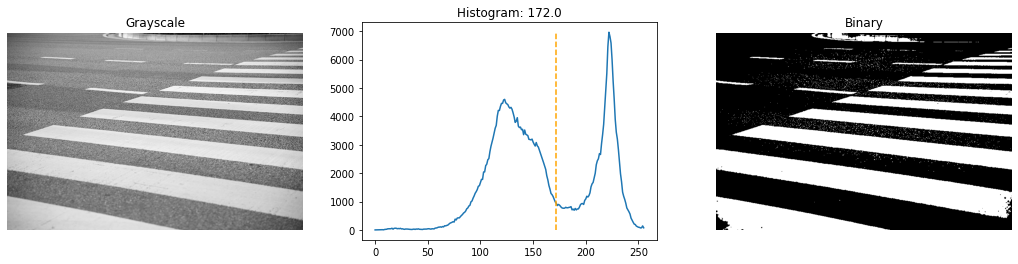

In [ ]:
# Work: OpenCVによる大津の2値化法


# I_grayと同じサイズの画像を作る
B = np.zeros_like(I_gray)

# Work: 2値化処理を自前でやってみる．
B[I_gray > th] = 255

fig = plt.figure(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.imshow(I_gray, cmap="gray")
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(hist)
plt.plot([th, th], [0, np.max(hist)], "--", color="orange")
plt.title(f"Histogram: {th}")

plt.subplot(1, 3, 3)
plt.imshow(B, cmap="gray")
plt.title("Binary")
plt.axis('off')
plt.show()